In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('wdi/Indicators.csv')

In [3]:
data.shape

(5656458, 6)

In [4]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
countries = data.CountryName.unique().shape
countries

(247,)

In [6]:
ccodes = data.CountryCode.unique().shape
ccodes

(247,)

In [7]:
data.IndicatorName.unique().shape

(1344,)

In [8]:
data.Year.unique().shape

(56,)

In [9]:
# range of years
print('data collected between ', data.Year.min(), ' and ', data.Year.max())

data collected between  1960  and  2015


## Getting CO2 Emissions for USA

In [10]:
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data.IndicatorName.str.contains(hist_indicator)
mask2 = data.CountryCode.str.contains(hist_country)

stage = data[mask1 & mask2]

In [11]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


## See how emissions have changed over the years

In [12]:
years = stage.Year.values
co2 = stage.Value.values

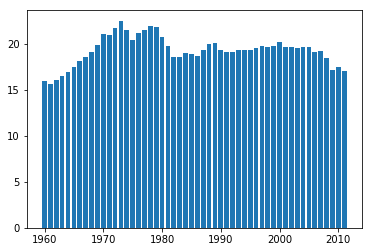

In [13]:
%matplotlib inline

plt.bar(years,co2)
plt.show()

Text(0.5,1,'CO2 Emissions in USA')

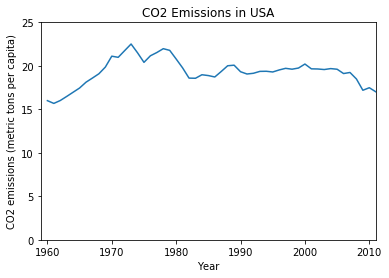

In [14]:
# switch to a line plot
plt.plot(stage.Year.values, stage.Value.values)

# label the axes
plt.xlabel('Year')
plt.ylabel(stage.IndicatorName.iloc[0])

# to make it more honest, start the y axes at 0
# axis -> sets the min and max of the x and y axes, with:
# ``v = [xmin, xmax, ymin, ymax]``

plt.axis([1959,2011,0,25])

# label the figure
plt.title('CO2 Emissions in USA')

## Using Histograms to explore the distribution of values

In [15]:
hist_data = stage.Value.values

In [16]:
hist_data.shape

(52,)

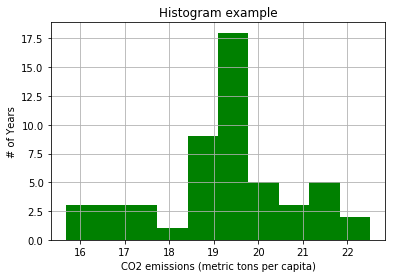

In [17]:
plt.hist(hist_data,10, density=False,facecolor='green')
plt.ylabel('# of Years')
plt.xlabel(stage.IndicatorName.iloc[0])
plt.title('Histogram example')
plt.grid(True)
plt.show()

## How do the USA numbers relate to those of other countries?

In [18]:
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data.IndicatorName.str.contains(hist_indicator)
mask2 = data.Year.isin([hist_year])

co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


### Plot a histogram of the emissions per capita by country

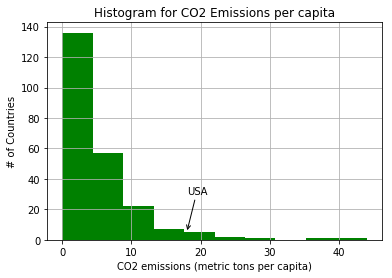

In [19]:
# subplots returns a tuple with the figure, axis attributes
fig, ax = plt.subplots()

ax.annotate("USA", 
           xy=(18,5), xycoords = 'data',
           xytext=(18,30), textcoords='data',
           arrowprops=dict(arrowstyle='->',connectionstyle='arc3'),
               )
plt.hist(co2_2011.Value,10, density=False,facecolor='green')
plt.xlabel(stage.IndicatorName.iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram for CO2 Emissions per capita')
plt.grid(True)
plt.show()

In [20]:
co2_2011[co2_2011.Value >20]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5053556,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,23.922412
5067585,Brunei Darussalam,BRN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,24.392013
5122885,Kuwait,KWT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,28.102662
5130057,Luxembourg,LUX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,20.897812
5152998,Oman,OMN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,20.203895
5161482,Qatar,QAT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,44.018926
5188137,Trinidad and Tobago,TTO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,37.140054
5193463,United Arab Emirates,ARE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,20.433838


## Relationship between GDP and CO2 emissions

In [21]:
gdp_mask = data.IndicatorName.str.contains('GDP per capita \(constant 2005')
country_mask = data.CountryCode.str.contains('USA')

gdp_stage = data[gdp_mask & country_mask]

In [22]:
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


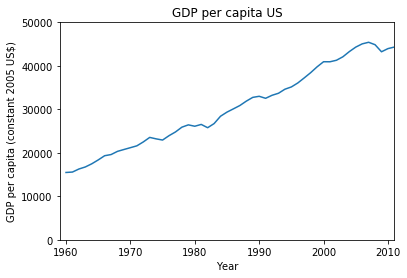

In [25]:
# trend for GDP / capita for the USA
plt.plot(gdp_stage.Year.values, gdp_stage.Value.values)

plt.xlabel('Year')
plt.ylabel(gdp_stage.IndicatorName.iloc[0])
plt.title('GDP per capita US')

plt.axis([1959,2011,0,50000])
plt.show()

### Scatterplot compare GDP against CO2 emissions

In [27]:
#making sure we work with the same time frames
print(stage.Year.min())
print(stage.Year.max())
print(gdp_stage.Year.min())
print(gdp_stage.Year.max())

1960
2011
1960
2014


In [28]:
#truncate gdp_stage
gdp_stage_trunc = gdp_stage[gdp_stage.Year < 2012]
print(len(stage))
print(len(gdp_stage_trunc))

52
52


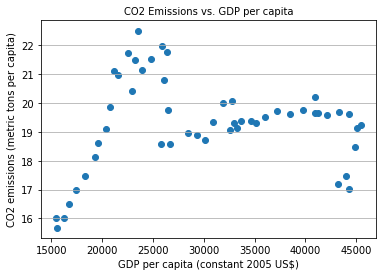

In [29]:
fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP per capita', fontsize=10)
axis.set_xlabel(gdp_stage_trunc.IndicatorName.iloc[0],fontsize=10)
axis.set_ylabel(stage.IndicatorName.iloc[0], fontsize=10)

X = gdp_stage_trunc.Value
Y = stage.Value

axis.scatter(X,Y)
plt.show()

In [30]:
np.corrcoef(gdp_stage_trunc.Value,stage.Value)

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

## Geographical visualization with Folium

In [31]:
import folium

In [32]:
country_geo = 'wdi/world-countries.json'

In [36]:
plot_data = co2_2011[['CountryCode', 'Value']]

In [37]:
plot_data.head()

,CountryCode,Value
5026275,ARB,4.724500
5026788,CSS,9.692960
5027295,CEB,6.911131
5027870,EAS,5.859548
5028456,EAP,5.302499


In [38]:
# label for the legend
hist_ind = co2_2011.iloc[0]['IndicatorName']

In [40]:
# Start a folium map at a high level of zoom
map = folium.Map(location=[100,0], zoom_start=1.5)

In [45]:
# choropleth maps bind pandas dataframes and json geometries
map.choropleth(geo_data=country_geo, data=plot_data, columns = ['CountryCode', 'Value'],key_on='feature.id', fill_color='YlGnBu', fill_opacity=.7, line_opacity=.2, legend_name=hist_ind)

In [47]:
map.save('wdi/co2map.html')

In [53]:
from IPython.display import HTML
HTML('<iframe src="wdi/co2map.html", width=900 height=700></iframe>')